In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generate Date

In [2]:
# Use command line to run simulations.
inputs='--mut 5e-05 --poptype F --s 0.24  --runs 1000 --lineage'
!python3 plateau_crossing.py $inputs --k 1
!python3 plateau_crossing.py $inputs --k 2
!python3 plateau_crossing.py $inputs --k 3

filename = "FNM" + inputs.split(" ")[1].upper()

Finished data/K1FNM5E-05! Used time: 8.613277196884155s
Finished data/K2FNM5E-05! Used time: 17.819366216659546s
Finished data/K3FNM5E-05! Used time: 23.65441370010376s


# Plots

In [7]:
try:
    filename
except:
    filename = "FNM5E-05"
    
colnames= ["dT"+str(i) for i in range(1,11)]
colnames.insert(0,"T0")
for i in range(1,4):
    temp = pd.read_csv("./data/K" + str(i) + filename + ".out", header=None, sep=",", names=colnames)
    klist = ["K="+str(i) for j in range(temp.shape[0])]
    temp.insert(0, "K", klist)
    locals()['dataK%s' % i] = temp

# dataR = pd.DataFrame({"K": ["Observe"], "T0": [50], "dT1": [10]})
TdeltaT = pd.concat([dataK1,dataK2,dataK3],ignore_index=True)
oberserTdeltaT = [50,10]

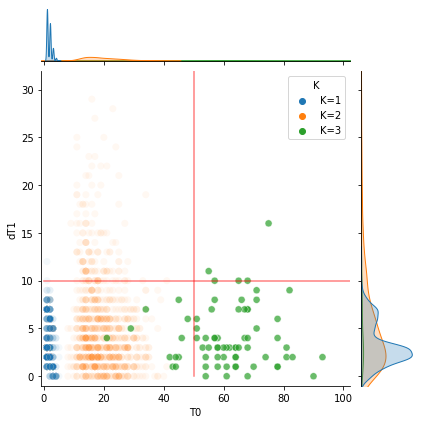

In [18]:
# Plot structure
graph = sns.jointplot(
    data=TdeltaT, x="T0", y="dT1",
    hue="K", kind="scatter", alpha=0.0
    # marginal_kws=dict(bins=30, fill=True)
)

# Plot dots with adaptive opacity
opacity = 50

# Add points
for i in range(1,4):
    plotDate = TdeltaT[TdeltaT.K == "K="+str(i)]
    graph.x = plotDate.T0
    graph.y = plotDate.dT1
    graph.plot_joint(sns.scatterplot, s=50, alpha = min(1,opacity/plotDate.count().K), legend = False)
# Plot 2 lines
graph.ax_joint.plot([oberserTdeltaT[0],oberserTdeltaT[0]], [0,2*max(TdeltaT.dT1)], 'r', alpha = 0.5) # Vertical
graph.ax_joint.plot([0,2*max(TdeltaT.T0)], [oberserTdeltaT[1],oberserTdeltaT[1]], 'r', alpha = 0.5) # Horizontal
graph.ax_marg_x.set_xlim(-1,1.1*max(TdeltaT.T0));
graph.ax_marg_y.set_ylim(-1,1.1*max(TdeltaT.dT1));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
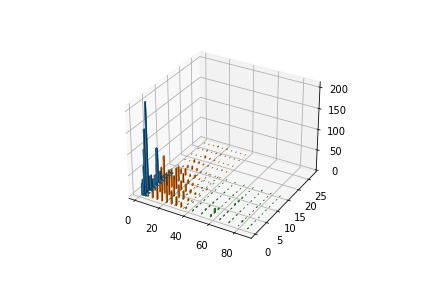

In [20]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


for i in range(1,4):
    plotDate = TdeltaT[TdeltaT.K == "K="+str(i)]
    x = plotDate.T0
    y = plotDate.dT1
    hist, xedges, yedges = np.histogram2d(x, y)

    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()